<a href="https://colab.research.google.com/github/Julia1707/ProyectDataYPF/blob/main/AtaquesCardiacos_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 4 🐼
## (Avalos - Espinoza - Garay - Humbert  - Stremel)
### Objetivo: analizar el impacto de factores socioeconómicos y de estilo de vida en el riesgo de infarto, y cómo estos factores pueden variar según diferentes regiones geográficas y demográficas.
#### Subobjetivos
* **Identificar factores de riesgo clave**: Determinar cuáles de las variables (como diabetes, historial familiar, tabaquismo, obesidad, etc.) tienen una mayor influencia en el riesgo de infarto.
* **Evaluar diferencias regionales**: Investigar cómo varían estos factores de riesgo según el país, continente y hemisferio.
* **Impacto socioeconómico**: Analizar la relación entre el nivel de ingresos y el riesgo de infarto.
* **Estilo de vida y salud**: Evaluar cómo las variables relacionadas con el estilo de vida (ejercicio, consumo de alcohol, dieta, horas de sueño, etc.) afectan el riesgo de infarto.
* **Desigualdades de salud**: Identificar posibles desigualdades en el riesgo de infarto según el sexo y la edad.

In [ ]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hap=pd.read_csv('/content/drive/MyDrive/DataSets/heart_attack_prediction_dataset.csv')
hap.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
# Eliminamos filas con valores nulos para limpieza inicial
hap = hap.dropna()
hap.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [ ]:
nuevo_nombre={
    'Patient ID': 'Paciente ID',
    'Age':'Edad',
    'Sex': 'Genero',
    'Cholesterol':'Colesterol',
    'Blood Pressure': 'Presión Sanguinea o Arterial',
    'Heart Rate': 'Ritmo Cardiaco',
    'Diabetes':'Diabetes',
    'Family History': 'Historial Familiar',
    'Smoking': 'Fumador',
    'Obesity':'Obesidad',
    'Alcohol Consumption': 'Consume alcohol',
    'Exercise Hours Per Week': 'Ejercicio en horas por semana',
    'Diet': 'Tipo de dieta',
    'Previous Heart Problems':'Previos problemas cardiacos',
    'Medication Use':'Uso de medicación',
    'Stress Level': 'Nivel de estrés',
    'Sedentary Hours Per Day': 'Horas sedentarias por semana',
    'Income': 'Ingreso/Sueldo',
    'BMI':'IMC',
    'Triglycerides':'Trigliceridos',
    'Physical Activity Days Per Week': 'Cantidad de días de actividad fisica por semana',
    'Sleep Hours Per Day': 'Horas de sueño por día',
    'Country': 'País',
    'Continent':'Continente',
    'Hemisphere': 'Hemisferio',
    'Heart Attack Risk': 'Riesgo de ataque cardiaco'
    }

In [ ]:
hap.rename(columns=nuevo_nombre,inplace=True)

####  Empezamos a visualizar los datos para analizarlos mejor

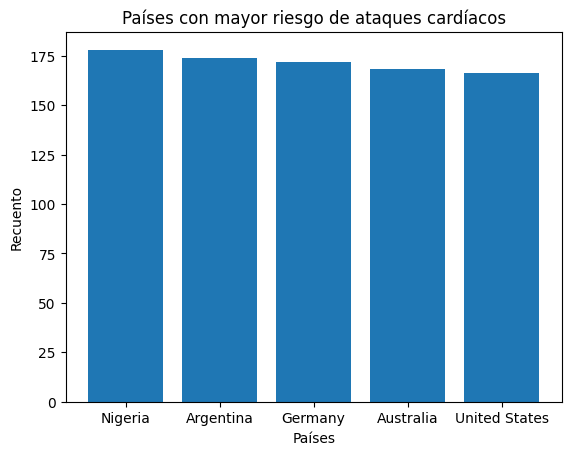

In [ ]:
# Países con mayor Riesgo de Ataques Cardíacos
# 1. contar la cantidad de paises totales para mostrar en 'Y'
# 2. sumar la cantidad de 'Riesgo de Ataque Cardíaco' por 'País'
# 3. mostrar los paises que tienen mayores valores en un top 5

count_country = hap["País"].value_counts()
sum_har = hap.groupby("País")["Riesgo de ataque cardiaco"].sum()
top_countries = sum_har.nlargest(5) # muestra el top 5 valores máx

plt.bar(top_countries.index,top_countries.values)
plt.xlabel("Países")
plt.ylabel("Recuento")
plt.title("Países con mayor riesgo de ataques cardíacos")
plt.show()

####  A partir del gráfico anterior, notamos que Argentina está en el 2do puesto de los países con mayor riesgo de ataques cardíacos. Vamos a seguir filtrando los datos a partir de Argentina para seguir analizando el resto de las variables

In [ ]:
#Filtrar datos por país
data_arg = hap[hap['País'] == 'Argentina']

#Inspeccionar el subconjunto filtrado
print(data_arg.head())

   Paciente ID  Edad  Genero  Colesterol Presión Sanguinea o Arterial  \
0      BMW7812    67    Male         208                       158/88   
30     SLE3369    27  Female         135                       120/77   
36     IUJ5442    27  Female         263                      127/109   
37     BSV5917    29  Female         201                       134/60   
46     QWD3129    51    Male         197                      106/106   

    Ritmo Cardiaco  Diabetes  Historial Familiar  Fumador  Obesidad  ...  \
0               72         0                   0        1         0  ...   
30              49         1                   1        0         0  ...   
36              83         0                   1        0         0  ...   
37              86         0                   0        0         1  ...   
46              79         1                   1        1         1  ...   

    Horas sedentarias por semana  Ingreso/Sueldo        IMC  Trigliceridos  \
0                       6.

####  Según investigaciones, existe una predisposición masculina a sufrir infartos debido a la forma de afrontar el estrés, un aumento de la presión arterial y una intensificación de los malos hábitos alimentarios. El siguiente gráfico demuestra esta propensión a sufrir problemas cardíacos en los hombres, ya que en la encuesta, más de la mitad de ellos son propensos.

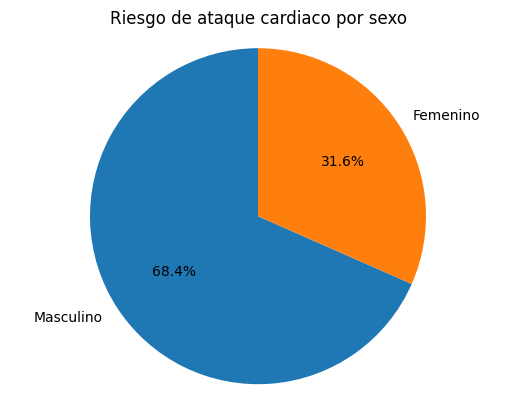

In [ ]:
male_risk = data_arg[(data_arg['Genero'] == 'Male') & (data_arg['Riesgo de ataque cardiaco'] == 1)].shape[0]
female_risk = data_arg[(data_arg['Genero'] == 'Female') & (data_arg['Riesgo de ataque cardiaco'] == 1)].shape[0]

sex = ["Masculino", "Femenino"]
data = [male_risk, female_risk]


plt.pie(data, labels=sex, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.rcParams['figure.figsize'] = (5, 5)
plt.title('Riesgo de ataque cardiaco por sexo')
plt.show()

#### Entre los factores de riesgo de un ataque cardíaco, se incluyen los siguientes: Edad. Los hombres mayores de 45 años y las mujeres mayores de 55 años tienen una mayor probabilidad de tener un ataque cardíaco que los hombres y las mujeres más jóvenes.

In [ ]:
#Crear categorías de edades para mostrar en el gráfico
bins = range(0,101,10) #rango de 0 a 100, agrupando de 10 en 10 años
labels = [f'{i}-{i+9}' for i in range (0,100,10)]

#Definimos data_risk_1 para los datos en Argentina con riesgo de infarto = 1
data_arg_risk_1 = data_arg[data_arg['Riesgo de ataque cardiaco'] == 1]

#Creamos una nueva columna en el Dataframe para las categorías de edad usando pd.cut
data_arg_risk_1['Categoría de Edad'] = pd.cut(data_arg_risk_1['Edad'], bins=bins, labels=labels, right=False)

#Mostrar el dataframe resultante
print(data_arg_risk_1)

     Paciente ID  Edad  Genero  Colesterol Presión Sanguinea o Arterial  \
30       SLE3369    27  Female         135                       120/77   
101      SIQ8677    39    Male         326                      155/104   
124      ELD0719    60    Male         338                       149/69   
176      PQR7571    41    Male         178                       123/91   
192      KLT7600    53    Male         136                       135/92   
...          ...   ...     ...         ...                          ...   
8414     KKQ7177    49    Male         192                       105/90   
8415     RCX4722    55    Male         332                       117/77   
8469     QJM4342    83    Male         265                       156/88   
8603     AVD8579    86    Male         293                      160/107   
8754     LZM3606    80  Female         383                       153/96   

      Ritmo Cardiaco  Diabetes  Historial Familiar  Fumador  Obesidad  ...  \
30                49 

<ipython-input-12-6a45206af090>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arg_risk_1['Categoría de Edad'] = pd.cut(data_arg_risk_1['Edad'], bins=bins, labels=labels, right=False)


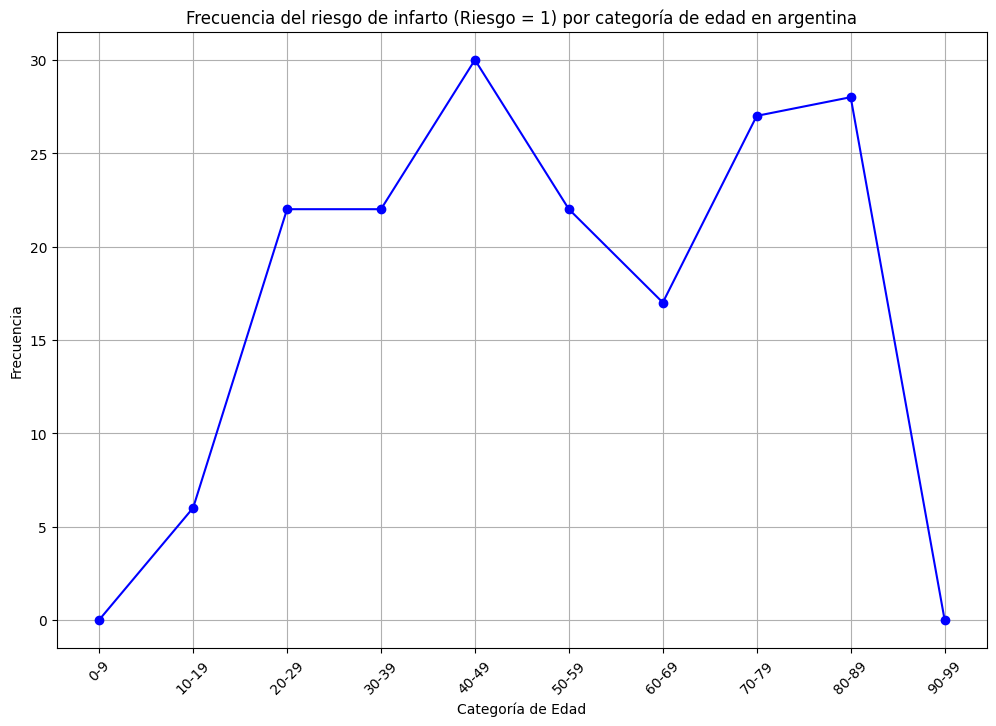

In [ ]:
#Calcular la frecuencia del riesgo de infarto por categoría de edad
freq_por_edad = data_arg_risk_1['Categoría de Edad'].value_counts().sort_index()

#Visualización de la frecuencia del riesgo de infarto por categoría de edad con gráfico de línea continua
plt.figure(figsize=(12, 8))
plt.plot(freq_por_edad.index, freq_por_edad.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Categoría de Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del riesgo de infarto (Riesgo = 1) por categoría de edad en argentina')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()